In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew,kurtosis

## Load Dataset

In [2]:
data=pd.read_csv(r"C:\Users\admin\Downloads\Dataset\Dataset\data1\Travel.csv")
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
del data["CustomerID"]

In [4]:
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

In [6]:
data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [7]:
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\2583931548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["DurationOfPitch"],fit=norm)


<Axes: xlabel='DurationOfPitch', ylabel='Density'>

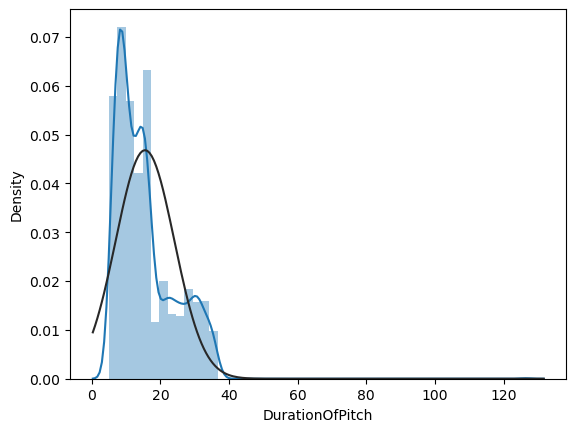

In [8]:
sns.distplot(data["DurationOfPitch"],fit=norm)

### Result:-
### above graph shows our null valued column data is normally distributed so we fill this null values using their mean.

## Null value handling

In [9]:
data["TypeofContact"]=data["TypeofContact"].fillna(method="ffill")

In [10]:
# fill null values with their  mean.
col=["Age","DurationOfPitch","NumberOfFollowups","PreferredPropertyStar","NumberOfTrips","NumberOfChildrenVisiting","MonthlyIncome"]
for i in col:
    mean=data[i].mean()
    data[i]=data[i].fillna(mean)

In [11]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [12]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
col=data.columns
for i in col:
    data[i]=le.fit_transform(data[i])

In [14]:
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,24,1,2,1,2,1,2,2,1,0,2,0,1,1,1,0,2,785
1,0,32,0,0,9,2,2,2,4,1,2,0,1,0,2,1,3,2,563
2,1,19,1,0,3,0,2,2,4,0,0,2,7,1,2,0,0,1,64
3,0,15,0,0,4,2,1,1,2,0,0,0,1,1,4,1,1,1,315
4,0,20,1,0,3,3,2,1,2,0,2,0,0,0,4,1,0,1,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,32,1,2,4,3,2,2,5,1,2,3,1,1,0,1,1,2,1896
4884,1,10,0,0,27,2,2,3,5,0,0,2,2,1,2,1,3,1,867
4885,1,35,1,2,13,2,1,3,4,3,2,1,7,0,0,1,4,3,2196
4886,1,1,1,2,12,3,2,2,4,0,0,2,2,0,4,0,3,1,595


C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


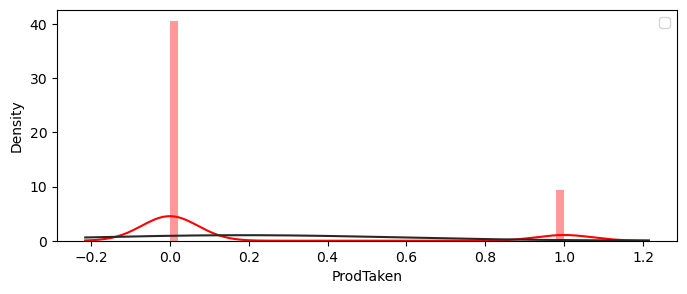

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


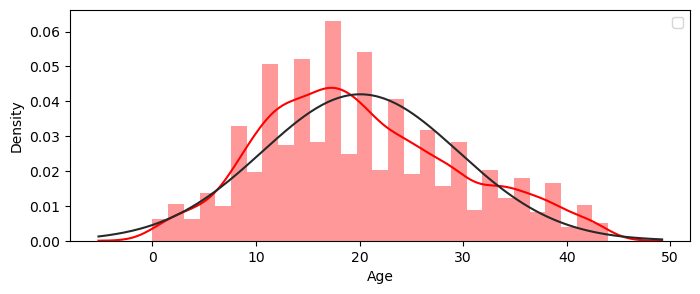

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


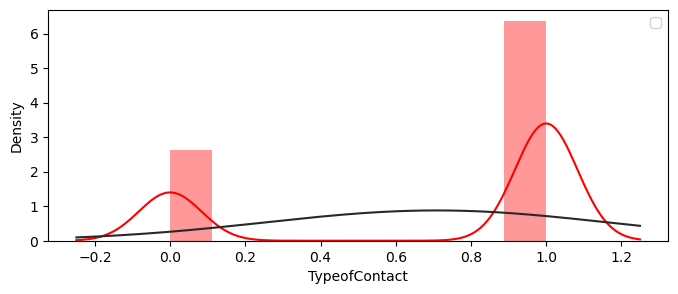

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


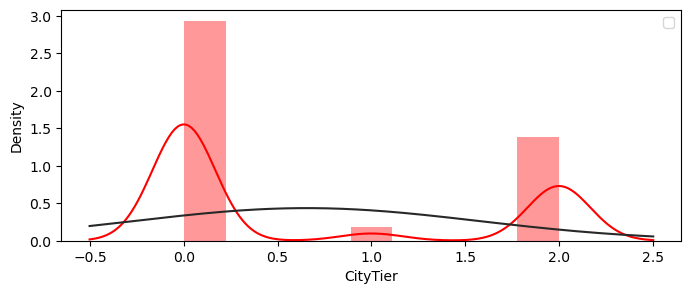

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


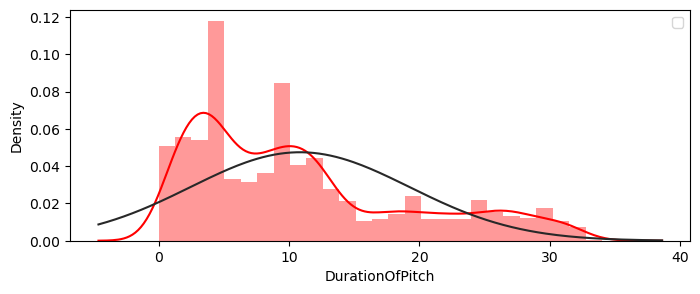

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


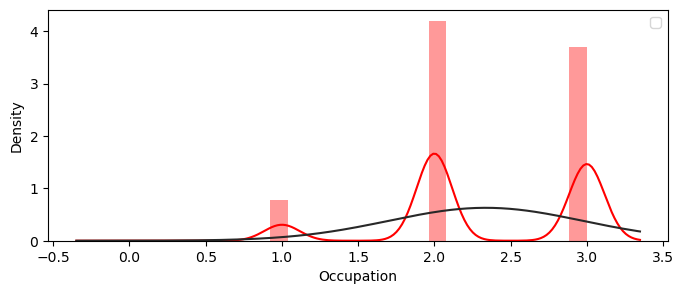

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


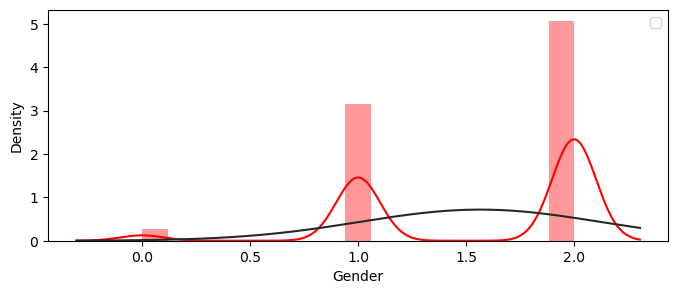

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


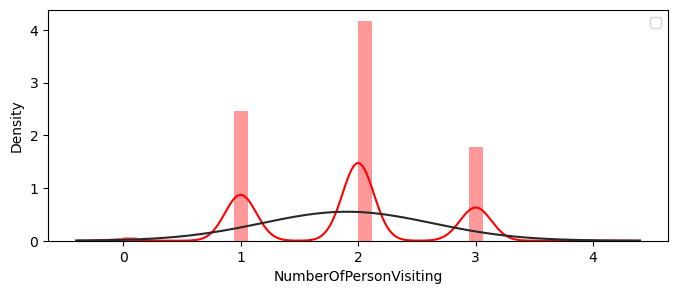

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


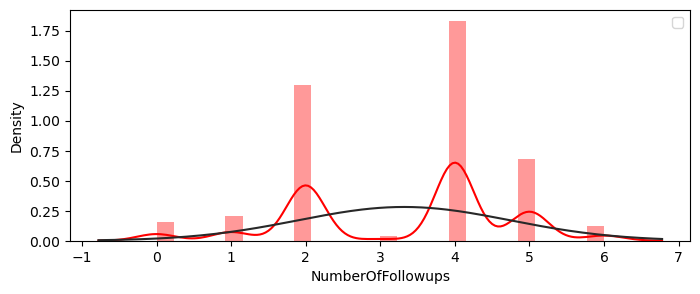

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


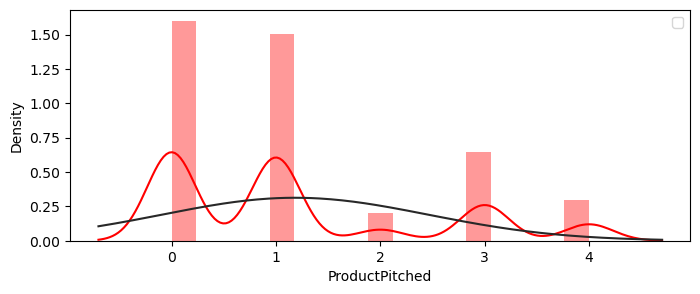

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


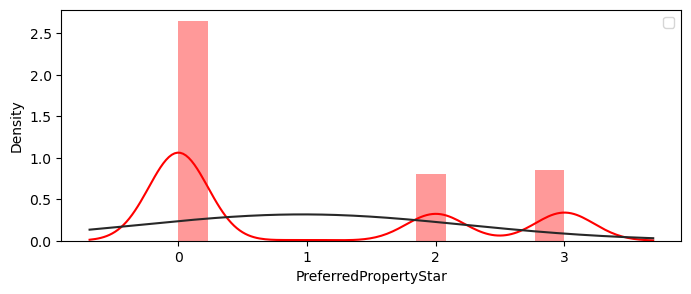

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


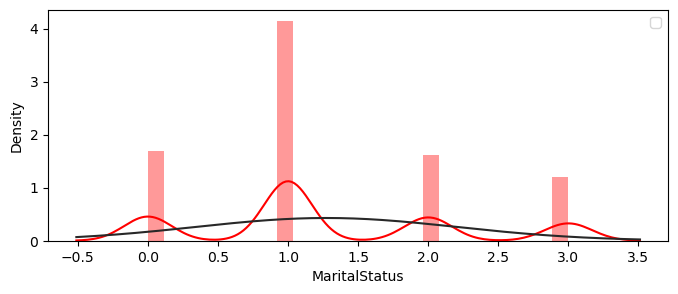

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


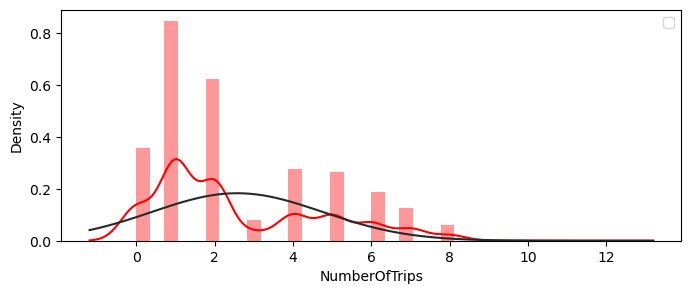

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


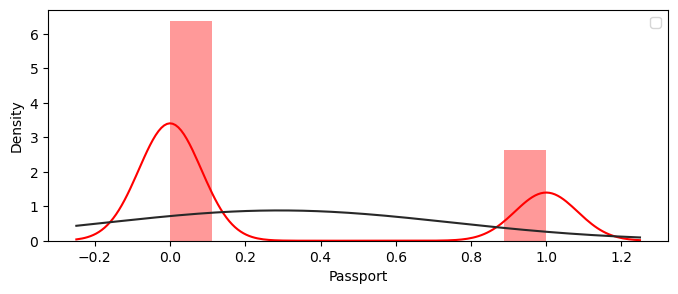

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


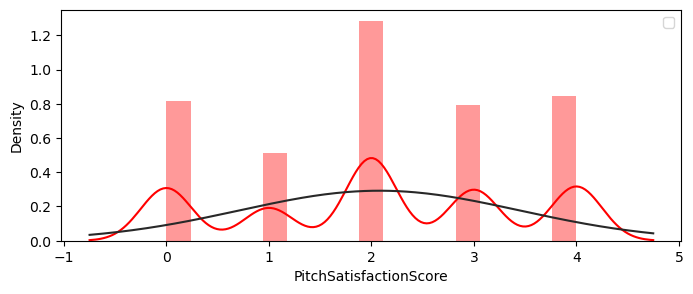

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


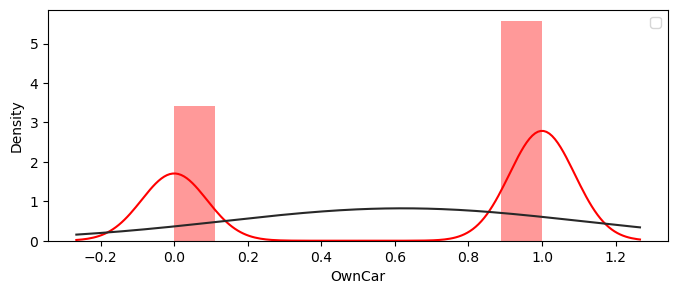

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


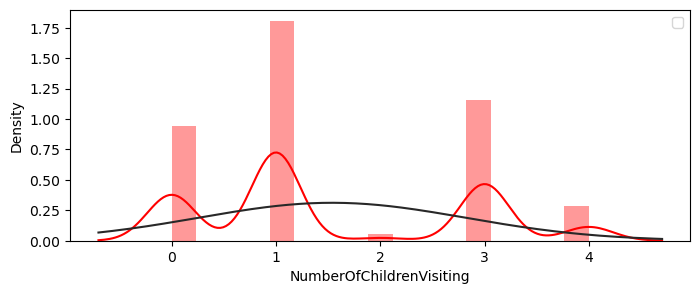

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


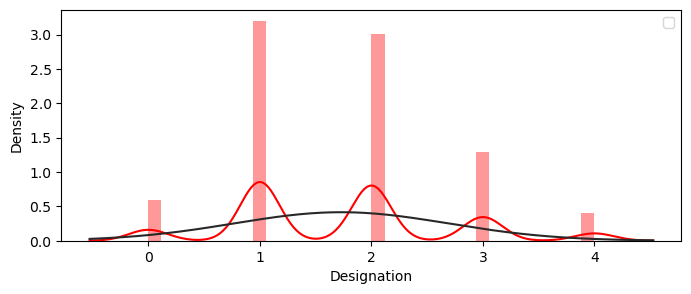

C:\Users\admin\AppData\Local\Temp\ipykernel_8260\886427597.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],fit=norm,color="red")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


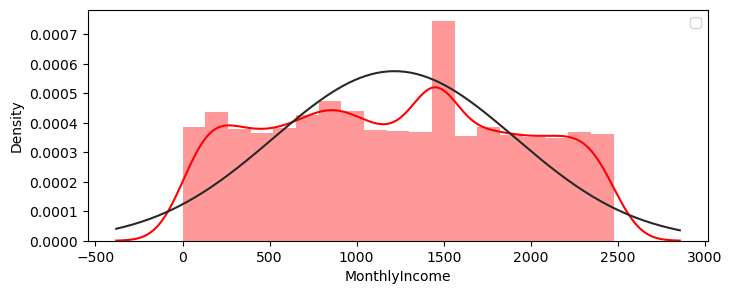

In [15]:
for i in col:
    plt.figure(figsize=(8,3))
    sns.distplot(data[i],fit=norm,color="red")
    plt.legend()
    plt.show()
#After comparing each column we need to normalise our data.    

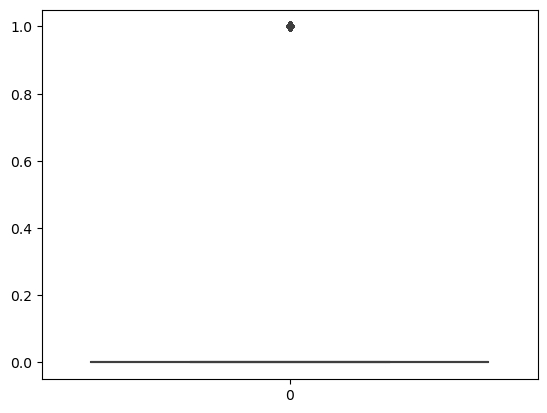

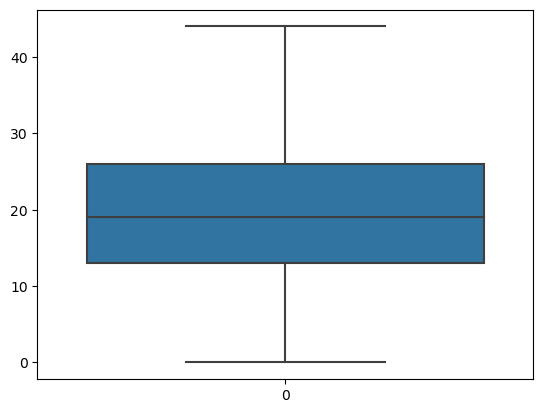

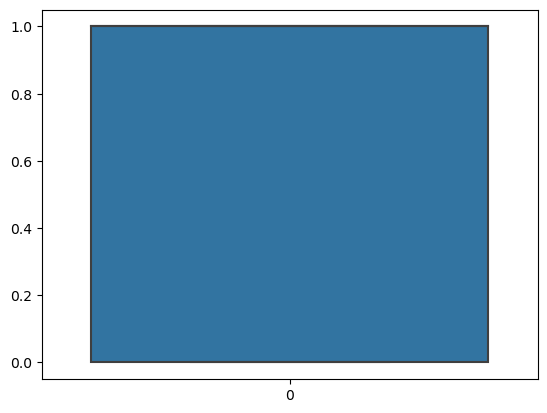

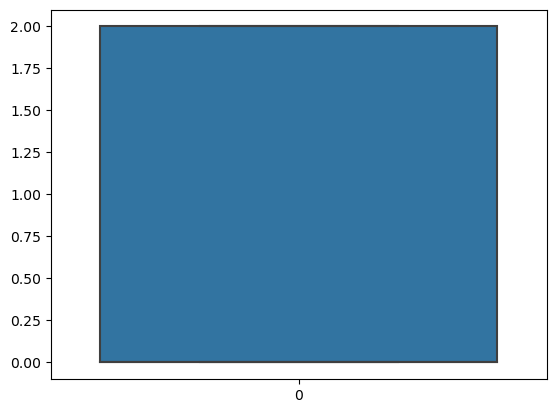

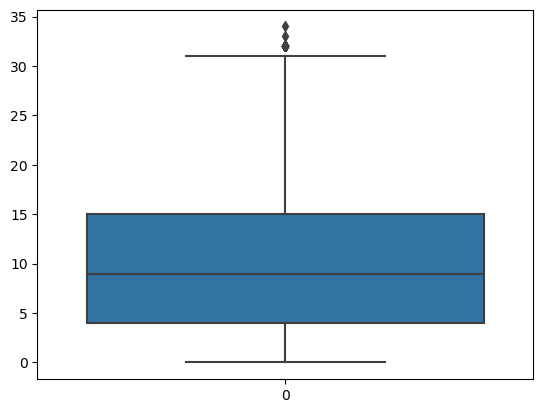

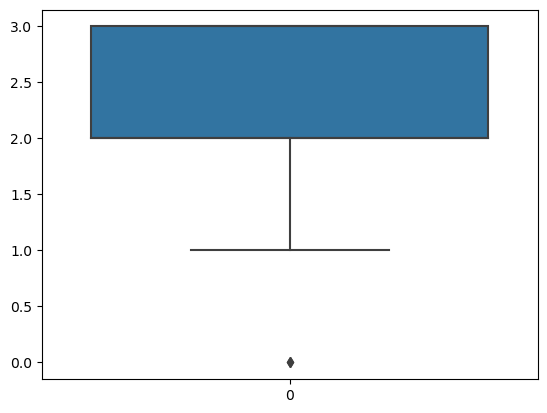

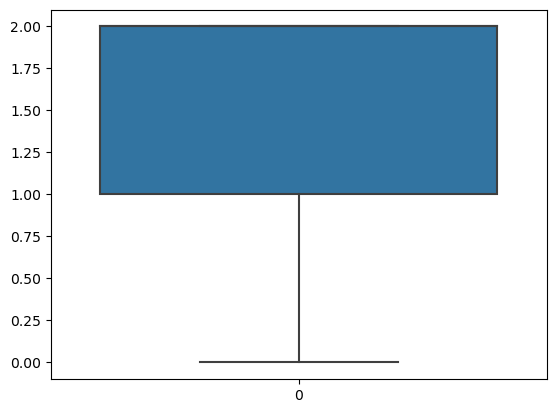

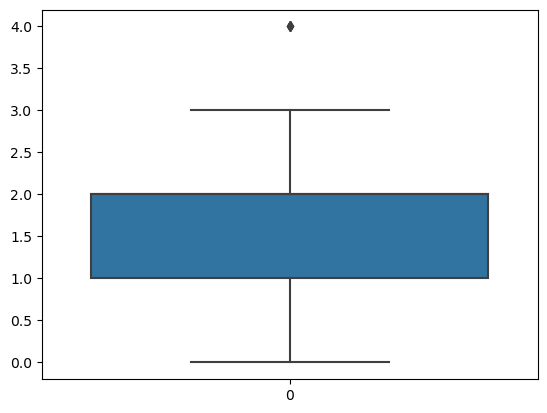

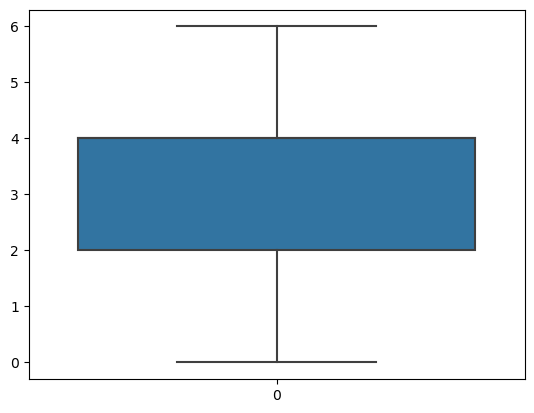

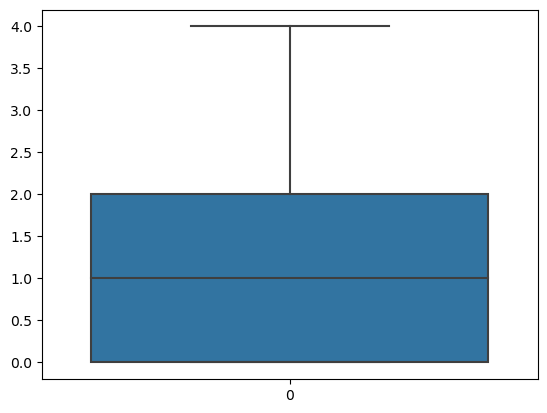

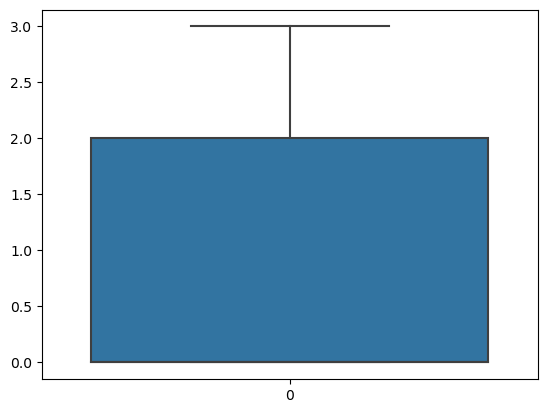

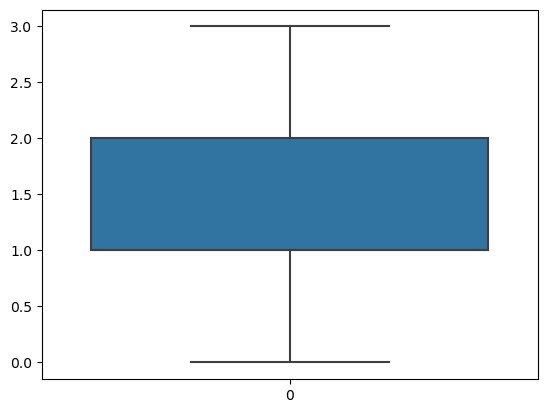

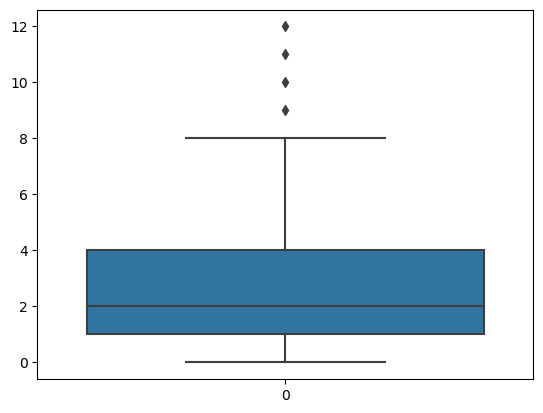

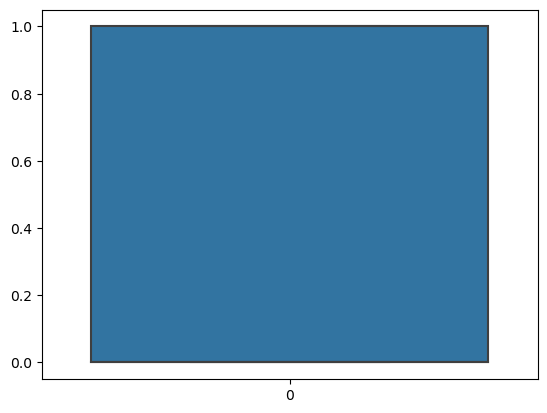

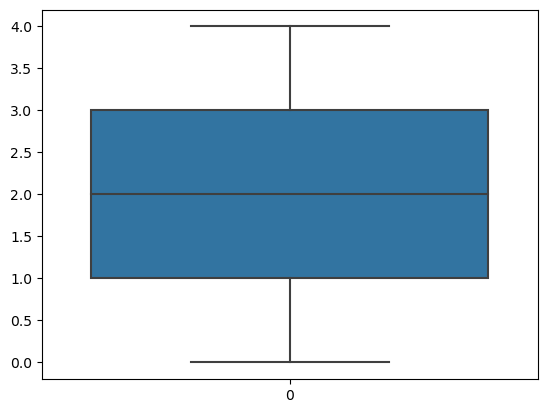

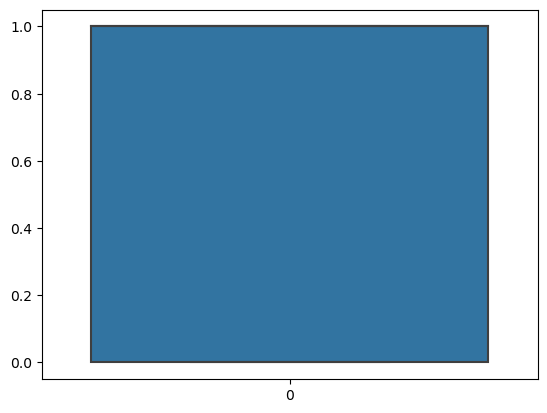

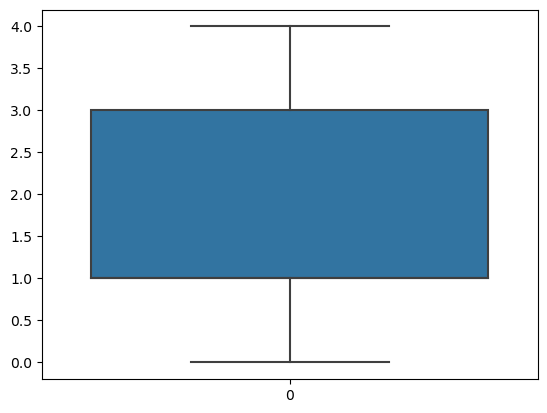

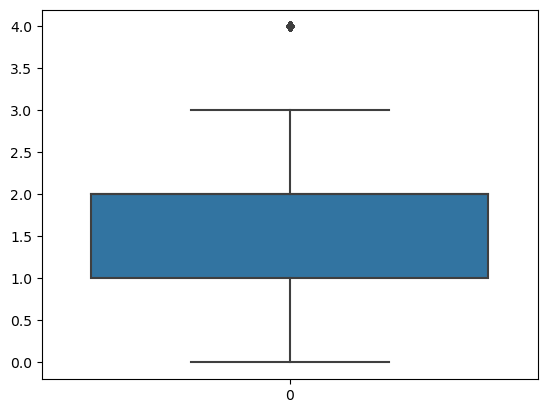

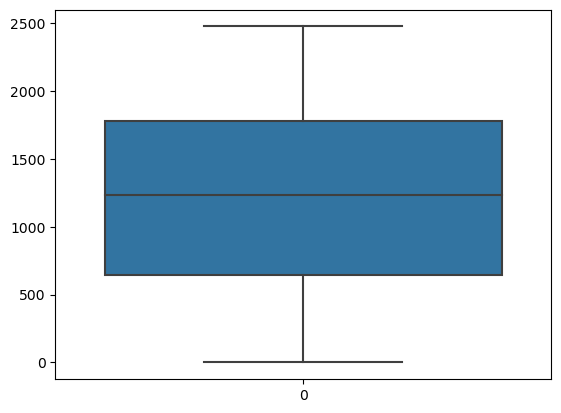

In [16]:
for i in col:
    sns.boxplot(data[i])
    plt.show()

In [17]:
sc=StandardScaler()
x=data.iloc[:,:-1]
y=data["MonthlyIncome"]
ind_data=sc.fit_transform(x)

In [18]:
ind_data1=pd.DataFrame(ind_data)

In [19]:
ind_data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.076787,0.413922,0.641795,1.468369,-1.172200,-0.530202,-1.015793,0.130966,-0.930113,-0.144027,-0.768155,0.782279,-1.182192,1.561221,-0.789477,0.782392,-1.202157,0.281885
1,-0.481513,1.256109,-1.558130,-0.713871,-0.219590,-0.530202,0.782539,0.130966,0.480058,-0.144027,0.822837,-1.367119,-0.722993,-0.640524,-0.057226,0.782392,1.142985,0.281885
2,2.076787,-0.112445,0.641795,-0.713871,-0.934047,-3.679204,0.782539,0.130966,0.480058,-0.927997,-0.768155,0.782279,2.032198,1.561221,-0.057226,-1.278132,-1.202157,-0.758790
3,-0.481513,-0.533539,-1.558130,-0.713871,-0.814971,-0.530202,-1.015793,-1.248694,-0.930113,-0.927997,-0.768155,-1.367119,-0.722993,1.561221,1.407276,0.782392,-0.420443,-0.758790
4,-0.481513,-0.007172,0.641795,-0.713871,-0.934047,1.044299,0.782539,-1.248694,-0.930113,-0.927997,0.822837,-1.367119,-1.182192,-0.640524,1.407276,0.782392,-1.202157,-0.758790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,2.076787,1.256109,0.641795,1.468369,-0.814971,1.044299,0.782539,0.130966,1.185144,-0.144027,0.822837,1.856978,-0.722993,1.561221,-1.521728,0.782392,-0.420443,0.281885
4884,2.076787,-1.059906,-1.558130,-0.713871,1.923784,-0.530202,0.782539,1.510626,1.185144,-0.927997,-0.768155,0.782279,-0.263795,1.561221,-0.057226,0.782392,1.142985,-0.758790
4885,2.076787,1.571929,0.641795,1.468369,0.256716,-0.530202,-1.015793,1.510626,0.480058,1.423913,0.822837,-0.292420,2.032198,-0.640524,-1.521728,0.782392,1.924698,1.322560
4886,2.076787,-2.007366,0.641795,1.468369,0.137639,1.044299,0.782539,0.130966,0.480058,-0.927997,-0.768155,0.782279,-0.263795,-0.640524,1.407276,-1.278132,1.142985,-0.758790


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ind_data,y,test_size=0.2,random_state=111)

In [21]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=l1.predict(x_test)

In [23]:
y_pred

array([2002.85338311, 2277.48452491,  807.41961413,  924.34960297,
       1295.82511691, 1411.89669716, 1964.12030837, 1092.07162513,
       1145.34810532,  809.82543861, 1090.06876495, 1679.66060562,
       1227.09011986, 1516.36968345, 1340.24297795, 1331.01836568,
       1189.6417123 , 1461.39524893, 2052.03952467,  456.48546193,
       1443.51597403, 1466.81354653, 1526.71160114, 2404.90022547,
       1777.84745981, 1406.10649814, 2295.78384393,  634.48549678,
        570.07211612, 2207.32819331,  861.16861939, 1890.05718667,
       1541.31710826, 1440.76039355,  143.29711092, 2126.21833373,
        810.95088964, 1915.63005941,  569.70633576,  526.13226536,
        972.73864538, 1923.68726325,  425.95461724, 1329.30851424,
       1040.86229737,  886.38788708, 1465.34958541,  985.59006581,
       1325.82246647,  594.54622323,  327.55252648,  902.49508434,
       1559.39722685,  821.39549897,  470.49200662,  972.22197457,
       1126.00626512,  978.60357241, 1398.38020453,  934.73463

In [24]:
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
score=r2_score(y_pred,y_test)*100
print("R2 Score of the model is : ",score,"%")

R2 Score of the model is :  54.91188681728261 %


## By using Libraries

In [26]:
err=mean_squared_error(y_pred,y_test)
print(err)

150443.90742894748


### By Calculation

In [27]:
error=(y_pred-y_test)*(y_pred-y_test)

In [28]:
error.mean()

150443.90742894748

## Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rfr=RandomForestRegressor()
RFR=rfr.fit(x_train,y_train)

In [31]:
y_pred1=rfr.predict(x_test)

In [32]:
score1=r2_score(y_pred1,y_test)*100
print("R2 Score using random forest Regressor is :",score1,"%")

R2 Score using random forest Regressor is : 81.99956260466504 %


In [33]:
err1=mean_squared_error(y_pred1,y_test)
print(err1)

71106.65311383455


## Hyper parameter tuning

In [34]:
z=[0.2,0.25,0.3,0.35]
for i in z:
    x_train,x_test,y_train,y_test=train_test_split(ind_data,y,test_size=i,random_state=111)
    rfr.fit(x_train,y_train)
    y_pred3=rfr.predict(x_test)
    score3=r2_score(y_pred3,y_test)
    print("when test size is :",i,"R2 score is :",score3)
    err3=np.sqrt(mean_squared_error(y_pred3,y_test))
    print("when test size is:",i,"Mean squared error is ",err3)
    print("-----------------------------------------------------")

when test size is : 0.2 R2 score is : 0.8195097246762326
when test size is: 0.2 Mean squared error is  267.85316079845296
-----------------------------------------------------
when test size is : 0.25 R2 score is : 0.8093603335979163
when test size is: 0.25 Mean squared error is  276.38793218241506
-----------------------------------------------------
when test size is : 0.3 R2 score is : 0.8218407179603258
when test size is: 0.3 Mean squared error is  268.8917736148869
-----------------------------------------------------
when test size is : 0.35 R2 score is : 0.8141976676469842
when test size is: 0.35 Mean squared error is  274.5874223096743
-----------------------------------------------------


In [35]:
z=[1,11,21,51,55,81,91,111,131]
for i in z:
    x_train,x_test,y_train,y_test=train_test_split(ind_data,y,test_size=0.2,random_state=i)
    rfr.fit(x_train,y_train)
    y_pred3=rfr.predict(x_test)
    score3=r2_score(y_pred3,y_test)
    print("when random state is :",i,"R2 score is :",score3)
    err3=np.sqrt(mean_squared_error(y_pred3,y_test))
    print("when random state is:",i,"square root Mean squared error is ",err3)
    print("-----------------------------------------------------")

when random state is : 1 R2 score is : 0.8101451338214232
when random state is: 1 square root Mean squared error is  274.7653333827307
-----------------------------------------------------
when random state is : 11 R2 score is : 0.7749130859651411
when random state is: 11 square root Mean squared error is  290.2255850514591
-----------------------------------------------------
when random state is : 21 R2 score is : 0.7936428043533561
when random state is: 21 square root Mean squared error is  274.98019090546785
-----------------------------------------------------
when random state is : 51 R2 score is : 0.8029110647401865
when random state is: 51 square root Mean squared error is  267.30268318385373
-----------------------------------------------------
when random state is : 55 R2 score is : 0.7716122801242393
when random state is: 55 square root Mean squared error is  291.0857310686664
-----------------------------------------------------
when random state is : 81 R2 score is : 0.837

### Result:-
### when test size is 20% and random state is 81 then our model gives us best accuracy.